### Importing Libraries

In [1]:
import glob
import random
import numpy as np
import pandas as pd
import os

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense

from tqdm import tqdm
from PIL import Image

from tensorflow.keras.utils import to_categorical

import seaborn as sns
import matplotlib.image as img
import matplotlib.pyplot as plt

###  Setting and Load Data

In [2]:
train_df = pd.read_csv("/Users/cordelia/Downloads/effnet/data/Training_set.csv")
test_df= pd.read_csv("/Users/cordelia/Downloads/effnet/data/Testing_set.csv")

In [3]:
train_fol = glob.glob("/Users/cordelia/Downloads/effnet/data/train/*") 
test_fol = glob.glob("/Users/cordelia/Downloads/effnet/data/test/*")

### Data Understanding

In [4]:
train_df.shape,test_df.shape

((12600, 2), (5400, 1))

In [5]:
train_df.isna().sum(), test_df.isna().sum()

(filename    0
 label       0
 dtype: int64,
 filename    0
 dtype: int64)

In [6]:
train_df.label.value_counts()

label
sitting               840
using_laptop          840
hugging               840
sleeping              840
drinking              840
clapping              840
dancing               840
cycling               840
calling               840
laughing              840
eating                840
fighting              840
listening_to_music    840
running               840
texting               840
Name: count, dtype: int64

In [7]:
train_df.label.nunique()

15

###  Analysis

In [8]:
import plotly.express as px
HAR = train_df.label.value_counts()
fig = px.pie(train_df, values=HAR.values, names=HAR.index,title="Label Distribution")
fig.show()

In [9]:
filename = train_df['filename']
labels = train_df['label']

In [10]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as img

def displaying_random():
    num = random.randint(1, 10000)  
    image_filename =  f"Image_{num}.jpg" 
    img_path = f"/Users/cordelia/Downloads/effnet/data/train/{image_filename}" 
    imgg = img.imread(img_path)  

    # Assuming 'train_df' is your DataFrame and contains 'filename' and 'label' columns
    label = train_df.loc[train_df['filename'] == image_filename, 'label'].item()  

    plt.imshow(imgg)
    plt.title(f"Label: {label}")
    plt.axis('off')
    plt.show()


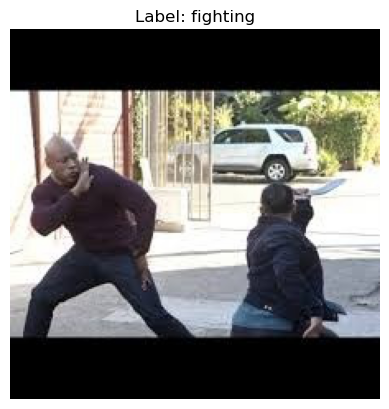

In [11]:
displaying_random()

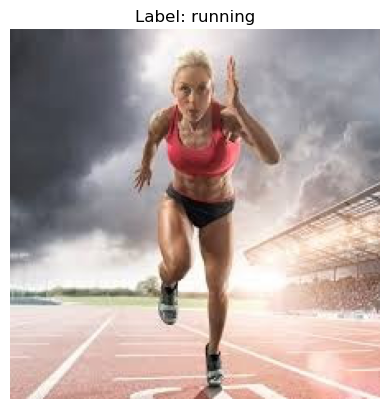

In [12]:
displaying_random()

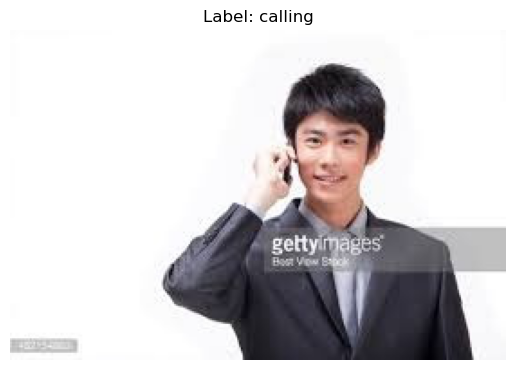

In [13]:
displaying_random()

In [14]:
image_data = []
image_label = []

for i in (range(len(train_fol)-1)):
    t = '/Users/cordelia/Downloads/effnet/data/train/' + filename[i]
    imgg = Image.open(t)
    image_data.append(np.asarray(imgg.resize((160,160))))
    image_label.append(labels[i])

In [15]:
iii = image_data
iii = np.asarray(iii)
type(iii)

numpy.ndarray

In [16]:
y_train = to_categorical(np.asarray(train_df["label"].factorize()[0]))
print(y_train[0])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


### RESNET MODEL BASELINE

In [23]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

# Define the model architecture
resnet_model = Sequential()

model = ResNet50(
    include_top=False,  # Do not include the fully connected layer at the top of the network
    input_shape=(160, 160, 3),  # Adjust according to your dataset's image dimensions
    pooling='avg',  # Add global average pooling layer after the last convolution block
    weights='imagenet'  # Use weights pre-trained on ImageNet
)

# Set all layers to non-trainable
for layer in model.layers:
    layer.trainable = False

# Add the pre-trained ResNet model
resnet_model.add(model)

# Add a fully connected layer with softmax activation for classification
resnet_model.add(Dense(15, activation='softmax'))  # Adjust the number of classes based on your dataset

# Compile the model
resnet_model.compile(
    optimizer='adam',  # Optimization algorithm
    loss='categorical_crossentropy',  # Loss function
    metrics=['accuracy']  # Metric to monitor
)

# Train the model
history_resnet_model = resnet_model.fit(
    iii, y_train,  # Variables containing the training data and labels
    epochs=6  # Number of epochs for training
)


94765736/94765736 [==============================] - 32s 0us/step
Epoch 1/6
394/394 [==============================] - 188s 474ms/step - loss: 1.6280 - accuracy: 0.4919
Epoch 2/6
394/394 [==============================] - 189s 479ms/step - loss: 1.2111 - accuracy: 0.6066
Epoch 3/6
394/394 [==============================] - 219s 556ms/step - loss: 1.0658 - accuracy: 0.6529
Epoch 4/6
394/394 [==============================] - 227s 576ms/step - loss: 0.9566 - accuracy: 0.6863
Epoch 5/6
394/394 [==============================] - 212s 539ms/step - loss: 0.8803 - accuracy: 0.7118
Epoch 6/6
394/394 [==============================] - 219s 555ms/step - loss: 0.8184 - accuracy: 0.7310


# MODELS (BASELINE) failed 

### Efficient Net, BASELINE

In [29]:
efficientnet_model = Sequential()

model = tf.keras.applications.EfficientNetB7(
    include_top=False,
    input_shape=(160, 160, 3),
    pooling="avg",
    weights="imagenet"
)

for layer in model.layers:
    layer.trainable = False

efficientnet_model.add(model)
efficientnet_model.add(Dense(15, activation="softmax"))  # 15 классов

efficientnet_model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

history_efficientnet_model = efficientnet_model.fit(
    iii, y_train, 
    epochs=6
)


Epoch 1/6
394/394 [==============================] - 690s 2s/step - loss: 1.3717 - accuracy: 0.5798
Epoch 2/6
394/394 [==============================] - 732s 2s/step - loss: 1.0636 - accuracy: 0.6640
Epoch 3/6
394/394 [==============================] - 693s 2s/step - loss: 0.9650 - accuracy: 0.6947
Epoch 4/6
394/394 [==============================] - 654s 2s/step - loss: 0.9068 - accuracy: 0.7117
Epoch 5/6
394/394 [==============================] - 733s 2s/step - loss: 0.8659 - accuracy: 0.7257
Epoch 6/6
394/394 [==============================] - 735s 2s/step - loss: 0.8218 - accuracy: 0.7400


### VGG 16, BASELINE 

In [30]:
vgg_model = Sequential()

pretrained_model = tf.keras.applications.VGG16(
    include_top=False,
    input_shape=(160, 160, 3),
    pooling='avg',  # Global Average Pooling
    weights='imagenet'
)

for layer in pretrained_model.layers:
    layer.trainable = False

vgg_model.add(pretrained_model)
vgg_model.add(Dense(15, activation='softmax'))  

vgg_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_vgg16 = vgg_model.fit(
    iii, y_train, 
    epochs=10
)


Epoch 1/10
394/394 [==============================] - 984s 2s/step - loss: 5.1085 - accuracy: 0.3229
Epoch 2/10
394/394 [==============================] - 1002s 3s/step - loss: 2.5975 - accuracy: 0.4839
Epoch 3/10
394/394 [==============================] - 1043s 3s/step - loss: 1.9609 - accuracy: 0.5391
Epoch 4/10
394/394 [==============================] - 1027s 3s/step - loss: 1.6487 - accuracy: 0.5745
Epoch 5/10
394/394 [==============================] - 990s 3s/step - loss: 1.4678 - accuracy: 0.5962
Epoch 6/10
394/394 [==============================] - 965s 2s/step - loss: 1.3807 - accuracy: 0.6065
Epoch 7/10
394/394 [==============================] - 1112s 3s/step - loss: 1.3126 - accuracy: 0.6184
Epoch 8/10
394/394 [==============================] - 941s 2s/step - loss: 1.2937 - accuracy: 0.6221
Epoch 9/10
394/394 [==============================] - 789s 2s/step - loss: 1.2581 - accuracy: 0.6252
Epoch 10/10
394/394 [==============================] - 736s 2s/step - loss: 1.2471 - ac

## Enhanced model ResNET

In [73]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import numpy as np

# Преобразуем размер данных
def resize_images(data, target_size=(128, 128)):
    resized_data = np.array([tf.image.resize(image, target_size).numpy() for image in data])
    return resized_data

# Преобразование тренировочных и валидационных данных
iii_train_resized = resize_images(iii_train, target_size=(128, 128))
iii_val_resized = resize_images(iii_val, target_size=(128, 128))

# Enhanced ResNet Model
enhanced_resnet_model = Sequential()
base_model = ResNet50(
    include_top=False,
    input_shape=(128, 128, 3),  # Размер входных данных
    weights='imagenet'
)

# Разморозить последние 15 слоев
for layer in base_model.layers[:-15]:
    layer.trainable = False
for layer in base_model.layers[-15:]:
    layer.trainable = True

enhanced_resnet_model.add(base_model)
enhanced_resnet_model.add(GlobalAveragePooling2D())
enhanced_resnet_model.add(BatchNormalization())
enhanced_resnet_model.add(Dense(512, activation='relu'))
enhanced_resnet_model.add(Dropout(0.4))
enhanced_resnet_model.add(Dense(15, activation='softmax'))

# Компиляция модели
enhanced_resnet_model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Вычисление весов классов
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train.argmax(axis=1)),
    y=y_train.argmax(axis=1)
)
class_weights = dict(enumerate(class_weights))

# Аугментация данных
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(iii_train_resized)

# Обучение модели
history_enhanced_resnet_model = enhanced_resnet_model.fit(
    datagen.flow(iii_train_resized, y_train, batch_size=64),  # Используем преобразованные данные
    validation_data=(iii_val_resized, y_val),  # Используем преобразованные данные
    epochs=20,
    class_weight=class_weights
)


Epoch 1/20
158/158 [==============================] - 158s 978ms/step - loss: 2.3066 - accuracy: 0.3315 - val_loss: 1.6786 - val_accuracy: 0.4869
Epoch 2/20
158/158 [==============================] - 189s 1s/step - loss: 1.6810 - accuracy: 0.4761 - val_loss: 1.5323 - val_accuracy: 0.5290
Epoch 3/20
158/158 [==============================] - 171s 1s/step - loss: 1.4732 - accuracy: 0.5307 - val_loss: 1.4569 - val_accuracy: 0.5504
Epoch 4/20
158/158 [==============================] - 171s 1s/step - loss: 1.2877 - accuracy: 0.5852 - val_loss: 1.4615 - val_accuracy: 0.5528
Epoch 5/20
158/158 [==============================] - 170s 1s/step - loss: 1.1540 - accuracy: 0.6283 - val_loss: 1.4704 - val_accuracy: 0.5591
Epoch 6/20
158/158 [==============================] - 171s 1s/step - loss: 1.0396 - accuracy: 0.6624 - val_loss: 1.4784 - val_accuracy: 0.5619
Epoch 7/20
158/158 [==============================] - 169s 1s/step - loss: 0.9275 - accuracy: 0.6954 - val_loss: 1.4158 - val_accuracy: 0.5

1/1 [==============================] - 1s 529ms/step
Вероятность: 96.10%
Предсказанный класс: calling


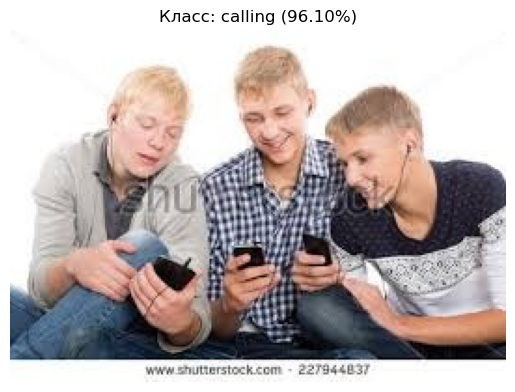

In [80]:
from tensorflow.keras.preprocessing import image

def read_image(image_path, target_size=(128, 128)):
    """
    Читает изображение, конвертирует его в RGB, изменяет размер и нормализует пиксели.
    """
    try:
        img = Image.open(image_path).convert('RGB')  
        img_resized = img.resize(target_size)  
        img_array = np.asarray(img_resized) / 255.0  
        return img_array
    except Exception as e:
        print(f"Ошибка при обработке изображения: {e}")
        return None

def test_predict(image_path, model):
    """
    Предсказывает класс реакции на изображение с использованием модели.
    """
    image_array = read_image(image_path, target_size=(128, 128))
    if image_array is None:
        return
    image_array = np.expand_dims(image_array, axis=0)  

    result = model.predict(image_array)
    prediction_index = np.argmax(result) 
    predicted_class = class_names[prediction_index]
    probability = np.max(result) * 100  

    print(f"Вероятность: {probability:.2f}%")
    print(f"Предсказанный класс: {predicted_class}")

    image = img.imread(image_path)
    plt.imshow(image)
    plt.title(f"Класс: {predicted_class} ({probability:.2f}%)")
    plt.axis('off')
    plt.show()

project_base_path = '/Users/cordelia/Downloads/effnet/data'
test_image_path = os.path.join(project_base_path, 'test', 'Image_1010.jpg')
test_predict(test_image_path, enhanced_resnet_model)


In [93]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers.legacy import Adam

def resize_images(data, target_size=(128, 128)):
    resized_data = np.array([tf.image.resize(image, target_size).numpy() for image in data])
    return resized_data

iii_resized = resize_images(iii, target_size=(128, 128))
iii_val_resized = resize_images(iii_val, target_size=(128, 128))

vgg_enhanced_model = Sequential()
pretrained_model = VGG16(
    include_top=False,
    input_shape=(128, 128, 3),
    pooling='avg',
    weights='imagenet'
)

for layer in pretrained_model.layers[:-5]:
    layer.trainable = False

vgg_enhanced_model.add(pretrained_model)
vgg_enhanced_model.add(Flatten())
vgg_enhanced_model.add(Dense(512, activation='relu'))
vgg_enhanced_model.add(BatchNormalization())
vgg_enhanced_model.add(Dropout(0.5))
vgg_enhanced_model.add(Dense(256, activation='relu'))
vgg_enhanced_model.add(BatchNormalization())
vgg_enhanced_model.add(Dropout(0.4))
vgg_enhanced_model.add(Dense(15, activation='softmax'))

vgg_enhanced_model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_vgg_enhanced = vgg_enhanced_model.fit(
    iii_resized, y_train,
    epochs=15,
    batch_size=64,
    validation_data=(iii_val_resized, y_val)
)


Epoch 1/15
158/158 [==============================] - 471s 3s/step - loss: 3.8182 - accuracy: 0.0655 - val_loss: 3.6589 - val_accuracy: 0.0770
Epoch 2/15
158/158 [==============================] - 530s 3s/step - loss: 3.6006 - accuracy: 0.0650 - val_loss: 4.7024 - val_accuracy: 0.0663
Epoch 3/15
158/158 [==============================] - 553s 4s/step - loss: 3.4526 - accuracy: 0.0679 - val_loss: 3.1059 - val_accuracy: 0.0556
Epoch 4/15
158/158 [==============================] - 572s 4s/step - loss: 3.3580 - accuracy: 0.0688 - val_loss: 2.8245 - val_accuracy: 0.0536
Epoch 5/15
158/158 [==============================] - 575s 4s/step - loss: 3.3073 - accuracy: 0.0672 - val_loss: 2.7601 - val_accuracy: 0.0726
Epoch 6/15
158/158 [==============================] - 582s 4s/step - loss: 3.2395 - accuracy: 0.0657 - val_loss: 2.7472 - val_accuracy: 0.0917
Epoch 7/15
158/158 [==============================] - 599s 4s/step - loss: 3.2058 - accuracy: 0.0710 - val_loss: 2.7262 - val_accuracy: 0.0663